Establishing the Environment:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
import pandas as pd
from google.colab import files

data = pd.read_csv('Housing.csv')
print(data.columns)
print(data)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      y

Preprocessing Data :

In [26]:
data = pd.read_csv('Housing.csv')

X = data.drop(['price'], axis=1)
y = data['price']


num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns


num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])


X_processed = preprocessor.fit_transform(X)


X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)


Linear Regression Model :

Linear Regression Train MSE: 968358188440.7244
Linear Regression Validation MSE: 1754318687330.669
Linear Regression Train R2: 0.6859438988560158
Linear Regression Validation R2: 0.6529242642153175


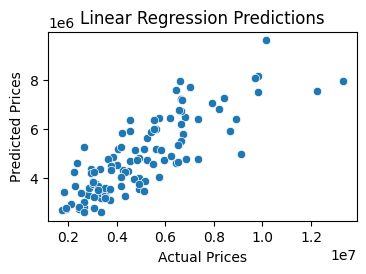

In [27]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_val = lr_model.predict(X_val)
lr_mse_train = mean_squared_error(y_train, y_pred_lr_train)
lr_mse_val = mean_squared_error(y_val, y_pred_lr_val)
lr_r2_train = r2_score(y_train, y_pred_lr_train)
lr_r2_val = r2_score(y_val, y_pred_lr_val)
print(f'Linear Regression Train MSE: {lr_mse_train}')
print(f'Linear Regression Validation MSE: {lr_mse_val}')
print(f'Linear Regression Train R2: {lr_r2_train}')
print(f'Linear Regression Validation R2: {lr_r2_val}')

# Visualize the Linear Regression
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_val, y=y_pred_lr_val)
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()


Training Random Forest Model :

Random Forest Train MSE: 156550617272.35132
Random Forest Validation MSE: 1972913836370.6726
Random Forest Train R2: 0.9492277990942519
Random Forest Validation R2: 0.6096772346191941


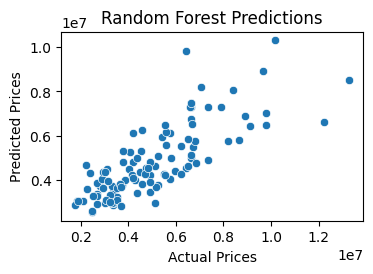

In [28]:
# Train a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_val = rf_model.predict(X_val)
rf_mse_train = mean_squared_error(y_train, y_pred_rf_train)
rf_mse_val = mean_squared_error(y_val, y_pred_rf_val)
rf_r2_train = r2_score(y_train, y_pred_rf_train)
rf_r2_val = r2_score(y_val, y_pred_rf_val)
print(f'Random Forest Train MSE: {rf_mse_train}')
print(f'Random Forest Validation MSE: {rf_mse_val}')
print(f'Random Forest Train R2: {rf_r2_train}')
print(f'Random Forest Validation R2: {rf_r2_val}')

# Visualize the Random Forest Predictions
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val, y=y_pred_rf_val)
plt.title('Random Forest Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()


Building Neural Network :

4/4 [==============================] - 0s 3ms/step
Neural Network Train MSE: 1203405586432.0
Neural Network Validation MSE: 2112358711296.0
Neural Network Train R2: 0.6097137737843186
Neural Network Validation R2: 0.582089348053529
4/4 [==============================] - 0s 3ms/step


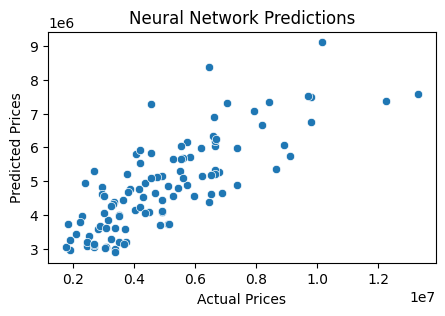

In [29]:

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


nn_model.compile(optimizer='adam', loss='mse')

history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

nn_mse_train = nn_model.evaluate(X_train, y_train, verbose=0)
nn_mse_val = nn_model.evaluate(X_val, y_val, verbose=0)
nn_r2_train = r2_score(y_train, nn_model.predict(X_train).flatten())
nn_r2_val = r2_score(y_val, nn_model.predict(X_val).flatten())
print(f'Neural Network Train MSE: {nn_mse_train}')
print(f'Neural Network Validation MSE: {nn_mse_val}')
print(f'Neural Network Train R2: {nn_r2_train}')
print(f'Neural Network Validation R2: {nn_r2_val}')

# Visualize the Neural Network Predictions
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_val, y=nn_model.predict(X_val).flatten())
plt.title('Neural Network Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Loss Curves :

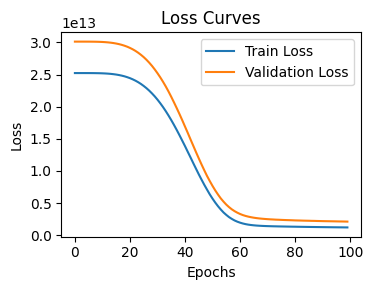

Linear Regression has the lowest validation MSE.
Linear Regression has the highest validation R2.


In [30]:
# Loss Curves
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

if lr_mse_val < rf_mse_val and lr_mse_val < nn_mse_val:
    print("Linear Regression has the lowest validation MSE.")
elif rf_mse_val < lr_mse_val and rf_mse_val < nn_mse_val:
    print("Random Forest has the lowest validation MSE.")
else:
    print("Neural Network has the lowest validation MSE.")

if lr_r2_val > rf_r2_val and lr_r2_val > nn_r2_val:
    print("Linear Regression has the highest validation R2.")
elif rf_r2_val > lr_r2_val and rf_r2_val > nn_r2_val:
    print("Random Forest has the highest validation R2.")
else:
    print("Neural Network has the highest validation R2.")
